# Arithmetic circuit examples

First we will show the circuit diagrams for the operations.

After that the low level bit operations such as carry and qsum are shown.

## Adders

In [21]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
import crsq.arithmetic as ari

### Unsigned adder

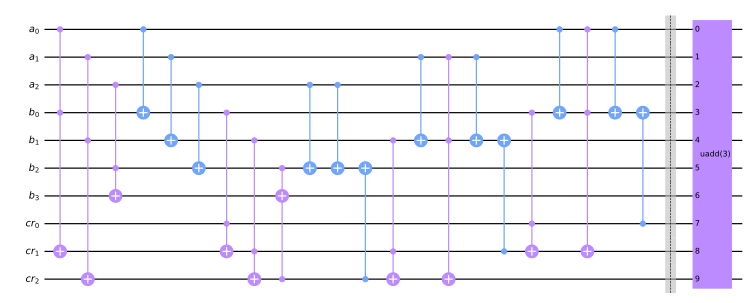

In [22]:
n=3
a = QuantumRegister(n, 'a')
b = QuantumRegister(n+1, 'b')
carry = QuantumRegister(n, 'cr')
qc = QuantumCircuit(a, b, carry)

# to make the internals visible:
ari.unsigned_adder(qc, a, b, carry)
qc.barrier()

# to hide the internals:
qc.append(ari.unsigned_adder_gate(n), a[:] + b[:] + carry[:])
qc.draw(scale=0.6)

The above rendition is probably too detailed for most audiences and purposes.

The internal sub components can be represented by gates if the use_gates argument is set to True

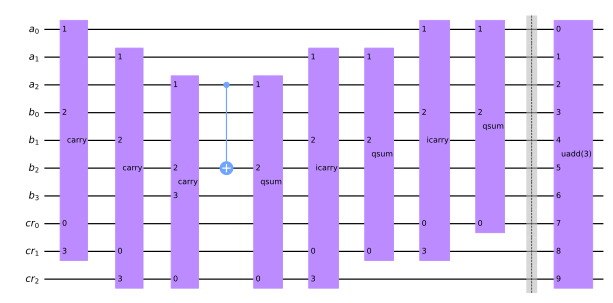

In [23]:
n=3
a = QuantumRegister(n, 'a')
b = QuantumRegister(n+1, 'b')
carry = QuantumRegister(n, 'cr')
qc = QuantumCircuit(a, b, carry)

# to make the internals visible, but use gates for sub circuits:
ari.unsigned_adder(qc, a, b, carry, use_gates=True)
qc.barrier()

# to hide the internals:
qc.append(ari.unsigned_adder_gate(n), a[:] + b[:] + carry[:])
qc.draw(scale=0.6)

To see the internals of the bitwise gates such as ``carry`` and ``qsum``, see the section {ref}`bit-operations`

### Unsigned adder with mismatched length

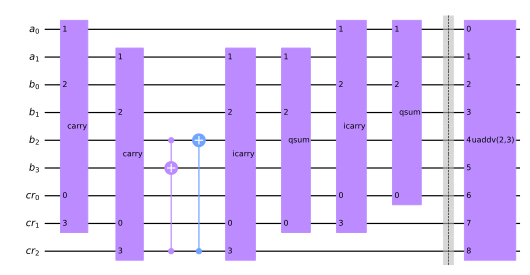

In [24]:
m=2
n=3
a = QuantumRegister(m, 'a')
b = QuantumRegister(n+1, 'b')
carry = QuantumRegister(n, 'cr')
qc = QuantumCircuit(a, b, carry)
ari.unsigned_adderv(qc, a, b, carry, use_gates=True)
qc.barrier()
qc.append(ari.unsigned_adderv_gate(m, n), a[:] + b[:] + carry[:])
qc.draw(scale=0.6)

### Signed adder

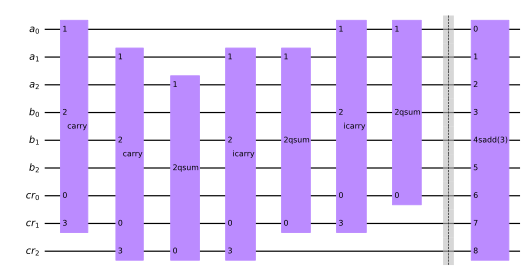

In [25]:
n=3
a = QuantumRegister(n, 'a')
b = QuantumRegister(n, 'b')
carry = QuantumRegister(n, 'cr')
qc = QuantumCircuit(a,b,carry)
ari.signed_adder(qc, a, b, carry, use_gates=True)
qc.barrier()
qc.append(ari.signed_adder_gate(n), a[:] + b[:] + carry[:])
qc.draw(scale=0.6)

### Plot of a signed adder

signed_adderv [ar,br] -> [ar, br(br+ar)] ar:b(3,0), br:a(3,0), cr:tmp0


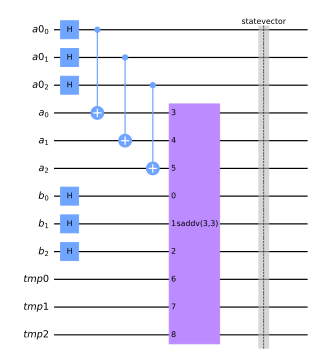

In [26]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit import transpile

import crsq.ast as ast
import crsq.statevector as stv
import crsq.heap as heap

m=3
M=2**m
a0reg = QuantumRegister(m, 'a0')
areg = QuantumRegister(m, 'a')
breg = QuantumRegister(m, 'b')
qc = QuantumCircuit(a0reg, areg, breg)
frame = heap.Frame(qc)

qc.h(a0reg[:m])
qc.h(breg[:m])

for i in range(a0reg.size):
    qc.cx(a0reg[i], areg[i])


sc = ast.new_scope(frame)

a0 = sc.register(a0reg, signed=True)
a = sc.register(areg, signed=True)
b = sc.register(breg, signed=True)
a += b

sc.build_circuit()

qc.save_statevector()

qc.draw(scale=0.6)


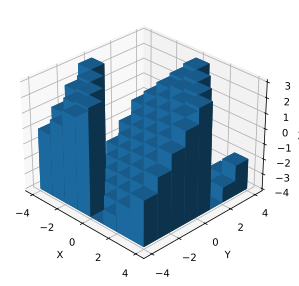

In [27]:
import matplotlib.pyplot as plt
import numpy as np


backend = AerSimulator()
tp = transpile(qc, backend)
result = backend.run(tp).result()

sv = result.get_statevector()
(x, y, z, dz) = stv.extract_arithmetic_result_2d_bars(frame, sv, a0, b, a)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=30, azim=-45)
ax.set(xlabel='X',ylabel='Y',zlabel='X+Y')

ax.bar3d(x, y, z, 1, 1, dz, shade=True)
plt.show()

### Signed adder with mismatched length

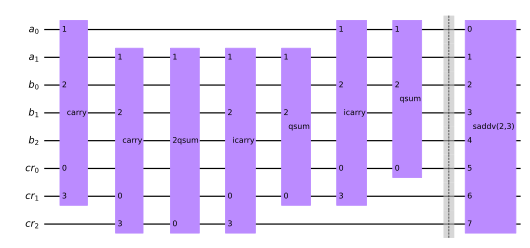

In [28]:
m=2
n=3
a = QuantumRegister(m, 'a')
b = QuantumRegister(n, 'b')
carry = QuantumRegister(n, 'cr')
qc = QuantumCircuit(a, b, carry)
ari.signed_adderv(qc, a, b, carry, use_gates=True)
qc.barrier()
qc.append(ari.signed_adderv_gate(m, n), a[:] + b[:] + carry[:])
qc.draw(scale=0.6)

### Signed constant value adder

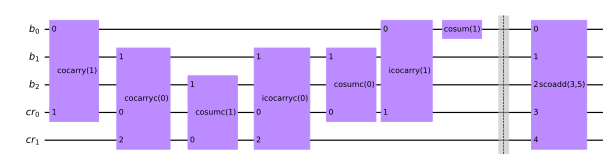

In [29]:
n=3
y = 5  # Add constant 5 to b register
b = QuantumRegister(n, 'b')
carry = QuantumRegister(n-1, 'cr')
qc = QuantumCircuit(b,carry)
ari.scoadder(qc, y, b, carry, use_gates=True)
qc.barrier()
qc.append(ari.scoadder_gate(n, y), b[:] + carry[:])
qc.draw(scale=0.6)

## Subtractors

### Unsigned subtractor

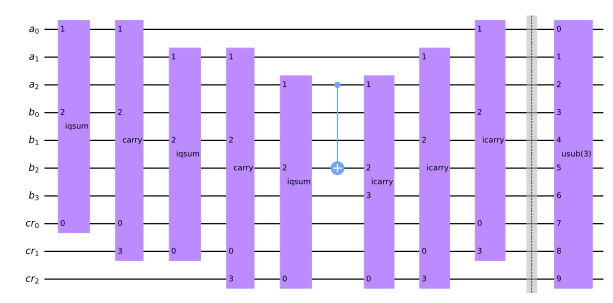

In [30]:
n=3
a = QuantumRegister(n, 'a')
b = QuantumRegister(n+1, 'b')
carry = QuantumRegister(n, 'cr')
qc = QuantumCircuit(a, b, carry)

# to make the internals visible:
ari.unsigned_subtractor(qc, a, b, carry, use_gates=True)
qc.barrier()

# to hide the internals:
qc.append(ari.unsigned_subtractor_gate(n), a[:] + b[:] + carry[:])
qc.draw(scale=0.6)

### Signed subtractor

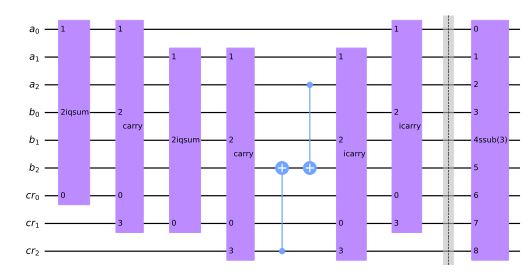

In [31]:
n=3
a = QuantumRegister(n, 'a')
b = QuantumRegister(n, 'b')
carry = QuantumRegister(n, 'cr')
qc = QuantumCircuit(a,b,carry)
ari.signed_subtractor(qc, a, b, carry, use_gates=True)
qc.barrier()
qc.append(ari.signed_subtractor_gate(n), a[:] + b[:] + carry[:])
qc.draw(scale=0.6)

### Plot of a signed subtractor

signed_subtractor [ar,br] -> [ar, br(br-ar)] ar:b(3,0), br:a(3,0), cr:tmp0


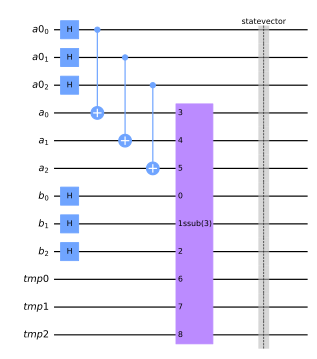

In [32]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit import transpile

import crsq.arithmetic as ari
import crsq.ast as ast
import crsq.statevector as stv
import crsq.heap as heap

m=3
M=2**m
a0reg = QuantumRegister(m, 'a0')
areg = QuantumRegister(m, 'a')
breg = QuantumRegister(m, 'b')
qc = QuantumCircuit(a0reg, areg, breg)
frame = heap.Frame(qc)

qc.h(a0reg[:m])
qc.h(breg[:m])

for i in range(a0reg.size):
    qc.cx(a0reg[i], areg[i])


sc = ast.new_scope(frame)

a0 = sc.register(a0reg, signed=True)
a = sc.register(areg, signed=True)
b = sc.register(breg, signed=True)
a -= b

sc.build_circuit()

qc.save_statevector()

qc.draw(scale=0.6)


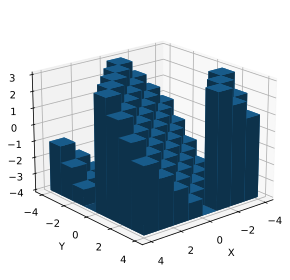

In [33]:
import matplotlib.pyplot as plt
import numpy as np


backend = AerSimulator()
tp = transpile(qc, backend)
result = backend.run(tp).result()

sv = result.get_statevector()
(x, y, z, dz) = stv.extract_arithmetic_result_2d_bars(frame, sv, a0, b, a)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=20, azim=50)
ax.set(xlabel='X',ylabel='Y',zlabel='X-Y')

ax.bar3d(x, y, z, 1, 1, dz, shade=True)
plt.show()

## Multipliers

### Unsigned multiplier

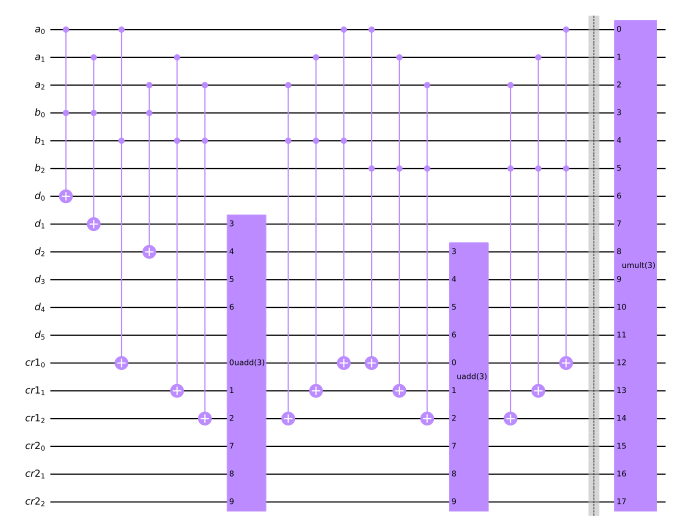

In [34]:
n=3
a = QuantumRegister(n, 'a')
b = QuantumRegister(n, 'b')
d = QuantumRegister(2*n, 'd')
cr1 = QuantumRegister(n, 'cr1')
cr2 = QuantumRegister(n, 'cr2')
qc = QuantumCircuit(a, b, d, cr1, cr2)

# to make the internals visible:
ari.unsigned_multiplier(qc, a, b, d, cr1, cr2)
qc.barrier()

# to hide the internals:
qc.append(ari.unsigned_multiplier_gate(n), a[:] + b[:] + d[:] + cr1[:] + cr2[:])
qc.draw(scale=0.6)

### Signed multiplier

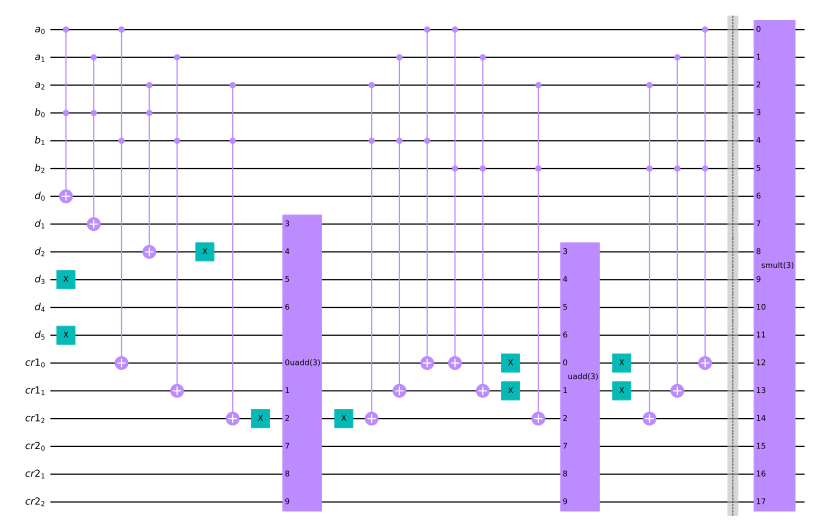

In [35]:
n=3
a = QuantumRegister(n, 'a')
b = QuantumRegister(n, 'b')
d = QuantumRegister(2*n, 'd')
cr1 = QuantumRegister(n, 'cr1')
cr2 = QuantumRegister(n, 'cr2')
qc = QuantumCircuit(a, b, d, cr1, cr2)

# to make the internals visible:
ari.signed_multiplier(qc, a, b, d, cr1, cr2, use_gates=True)
qc.barrier()

# to hide the internals:
qc.append(ari.signed_multiplier_gate(n), a[:] + b[:] + d[:] + cr1[:] + cr2[:])
qc.draw(scale=0.6,fold=-1)

## Dividers

### Unsigned divider

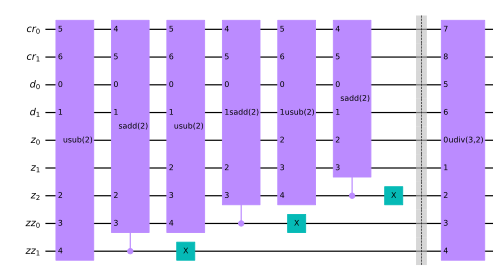

In [36]:
m=3
n=2
z = QuantumRegister(m, 'z')
zz = QuantumRegister(n, 'zz')
d = QuantumRegister(n, 'd')
cr = QuantumRegister(n, 'cr')
qc = QuantumCircuit(cr, d, z, zz)

# to make the internals visible:
ari.unsigned_divider(qc, z, zz, d, cr, use_gates=True)
qc.barrier()

# to hide the internals:
qc.append(ari.unsigned_divider_gate(m, n), z[:] + zz[:] + d[:] + cr[:])
qc.draw(scale=0.6)

### Plot of a divider

unsigned_divider zr:c(8,7), zzr:zz0, dr:b(4,0), cr:tmp0 qr:qq0(8,7)
[Qubit(QuantumRegister(8, 'c'), 4), Qubit(QuantumRegister(8, 'c'), 5), Qubit(QuantumRegister(8, 'c'), 6), Qubit(QuantumRegister(8, 'c'), 7), Qubit(QuantumRegister(1, 'zz0'), 0), Qubit(QuantumRegister(1, 'zz1'), 0), Qubit(QuantumRegister(1, 'zz2'), 0), Qubit(QuantumRegister(1, 'zz3'), 0)]


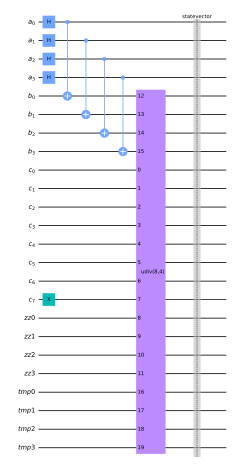

In [37]:
m = 4
areg = QuantumRegister(m, 'a')
breg = QuantumRegister(m, 'b')
creg = QuantumRegister(m+4, 'c')
qc = QuantumCircuit(areg, breg, creg)

qc.h(areg)
for i in range(areg.size):
    qc.cx(areg[i], breg[i])

qc.x(creg[creg.size - 1])

sc = ast.new_scope(qc)

b = sc.register(breg)
c = sc.register(creg, fraction_bits=creg.size-1)
d = c / b

sc.build_circuit()

qc.save_statevector()

print(d.register)

qc.draw(scale=0.4)

x [15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
y [0.0625, 0.0703125, 0.0703125, 0.078125, 0.0859375, 0.09375, 0.109375, 0.125, 0.140625, 0.1640625, 0.1953125, 0.25, 0.328125, 0.5, 1.0, 1.9296875]


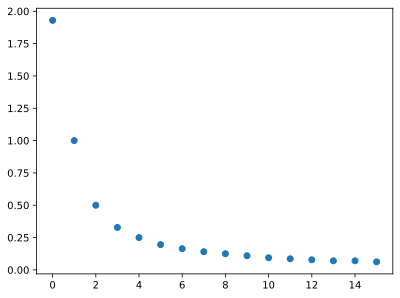

In [38]:
tp = transpile(qc, backend)
result = backend.run(tp).result()

sv = result.get_statevector()
(x,y) = stv.extract_arithmetic_result_1d_scatter(qc, sv, b, d)

print("x", x)
print("y", y)
fig, ax = plt.subplots()

ax.scatter(x,y)

## Single argument functions

### Unsigned square

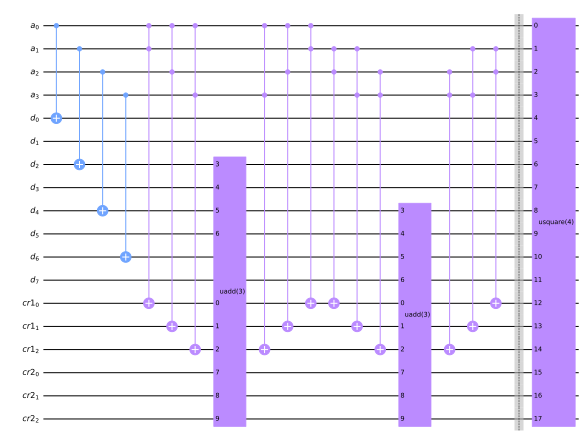

In [39]:
n=4
a = QuantumRegister(n, 'a')
d = QuantumRegister(2*n, 'd')
cr1 = QuantumRegister(n-1, 'cr1')
cr2 = QuantumRegister(n-1, 'cr2')
qc = QuantumCircuit(a, d, cr1, cr2)

# to make the internals visible:
ari.unsigned_square(qc, a, d, cr1, cr2, use_gates=True)
qc.barrier()

# to hide the internals:
qc.append(ari.unsigned_square_gate(n), a[:] + d[:] + cr1[:] + cr2[:])
qc.draw(scale=0.5)

### Signed square

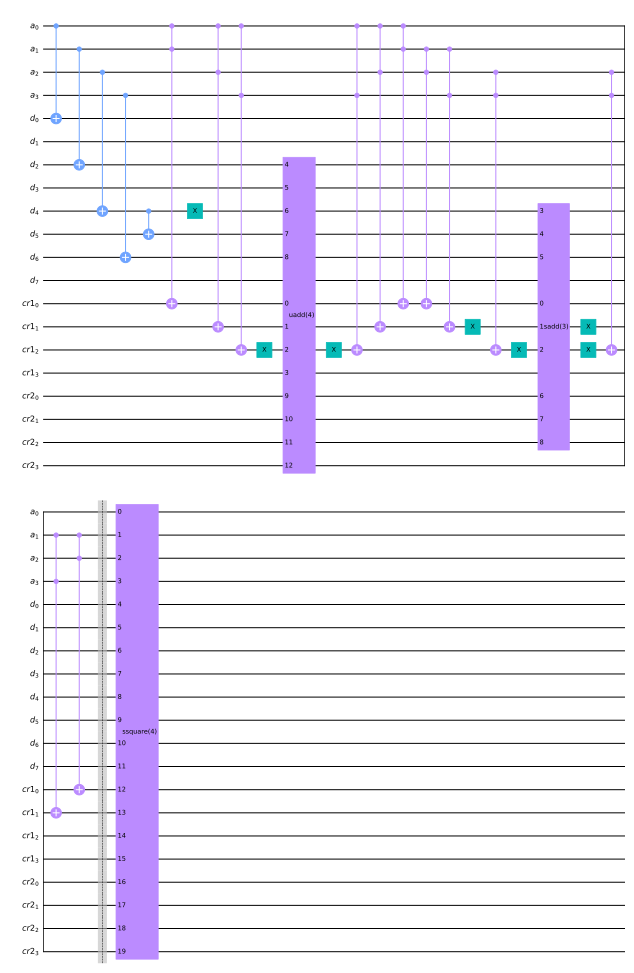

In [40]:
n=4
a = QuantumRegister(n, 'a')
d = QuantumRegister(2*n, 'd')
cr1 = QuantumRegister(n, 'cr1')
cr2 = QuantumRegister(n, 'cr2')
qc = QuantumCircuit(a, d, cr1, cr2)

# to make the internals visible:
ari.signed_square(qc, a, d, cr1, cr2, use_gates=True)
qc.barrier()

# to hide the internals:
qc.append(ari.signed_square_gate(n), a[:] + d[:] + cr1[:] + cr2[:])
qc.draw(scale=0.5)

### Plot of signed square

QuantumRegister(8, 'square0')
signed_square ar:b(4,0), cr1:c0, cr2:c1, dr:square0(8,0)


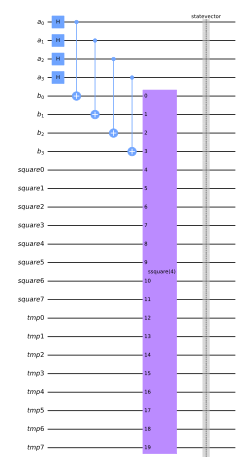

In [41]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit import transpile

import crsq.arithmetic as ari
import crsq.ast as ast
import crsq.statevector as stv
import crsq.heap as heap

areg = QuantumRegister(4, 'a')
breg = QuantumRegister(4, 'b')
qc = QuantumCircuit(areg, breg)
frame = heap.Frame(qc)

qc.h(areg)
for i in range(areg.size):
    qc.cx(areg[i], breg[i])

sc = ast.new_scope(frame)

a = sc.register(areg, signed=True)
b = sc.register(breg, signed=True)
c = sc.square(b)

print(c.register)

sc.build_circuit()

qc.save_statevector()

qc.draw(scale=0.4)


x [0, 1, -1, 2, -2, 3, -3, 4, -4, 5, -5, 6, -6, 7, -7, -8]
y [0, 1, 1, 4, 4, 9, 9, 16, 16, 25, 25, 36, 36, 49, 49, 64]


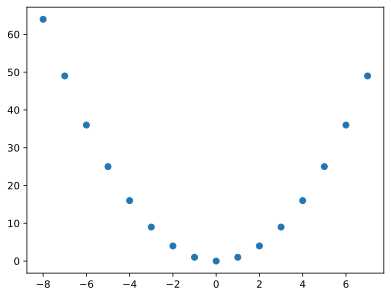

In [42]:
import matplotlib.pyplot as plt
import numpy as np

backend = AerSimulator()
tp = transpile(qc, backend)
result = backend.run(tp).result()

sv = result.get_statevector()
(x,y) = stv.extract_arithmetic_result_1d_scatter(frame, sv, a, c)

print("x", x)
print("y", y)
fig, ax = plt.subplots()

ax.scatter(x,y)
plt.show()

### Square root

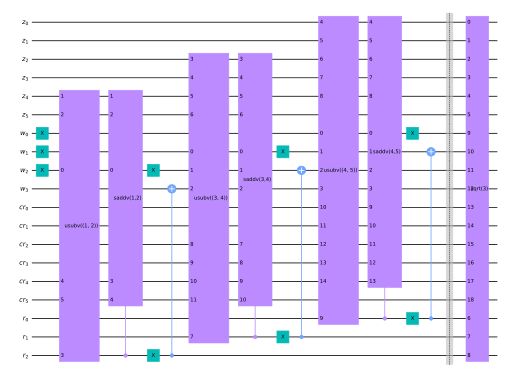

In [43]:
n=3
z = QuantumRegister(2*n, 'z')
r = QuantumRegister(n, 'r')
w = QuantumRegister(n+1, 'w')
cr = QuantumRegister(2*n, 'cr')
qc = QuantumCircuit(z, w, cr, r)

# to make the internals visible:
ari.square_root(qc, z, r, w, cr, use_gates=True)
qc.barrier()

# to hide the internals:
qc.append(ari.square_root_gate(n), z[:] + r[:] + w[:] + cr[:])
qc.draw(scale=0.4)

### Plot of square root

QuantumRegister(3, 'sqrt0')
square_root zr:b(6,4), rr:sqrt0(3,2), wr:w0, cr:c0


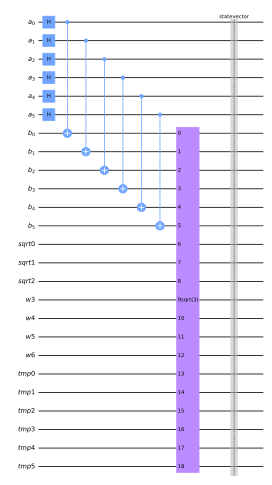

In [44]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit import transpile

import crsq.arithmetic as ari
import crsq.ast as ast
import crsq.statevector as stv
import crsq.heap as heap

m = 6

areg = QuantumRegister(m, 'a')
breg = QuantumRegister(m, 'b')
qc = QuantumCircuit(areg, breg)
frame = heap.Frame(qc)

qc.h(areg)
for i in range(areg.size):
    qc.cx(areg[i], breg[i])

sc = ast.new_scope(frame)

a = sc.register(areg, signed=False, fraction_bits=4)
b = sc.register(breg, signed=False, fraction_bits=4)
c = sc.square_root(b)

print(c.register)

sc.build_circuit()

qc.save_statevector()

qc.draw(scale=0.4)


x [0.0, 0.0625, 0.125, 0.1875, 0.25, 0.3125, 0.375, 0.4375, 0.5, 0.5625, 0.625, 0.6875, 0.75, 0.8125, 0.875, 0.9375, 1.0, 1.0625, 1.125, 1.1875, 1.25, 1.3125, 1.375, 1.4375, 1.5, 1.5625, 1.625, 1.6875, 1.75, 1.8125, 1.875, 1.9375, 2.0, 2.0625, 2.125, 2.1875, 2.25, 2.3125, 2.375, 2.4375, 2.5, 2.5625, 2.625, 2.6875, 2.75, 2.8125, 2.875, 2.9375, 3.0, 3.0625, 3.125, 3.1875, 3.25, 3.3125, 3.375, 3.4375, 3.5, 3.5625, 3.625, 3.6875, 3.75, 3.8125, 3.875, 3.9375]
y [0.0, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75]


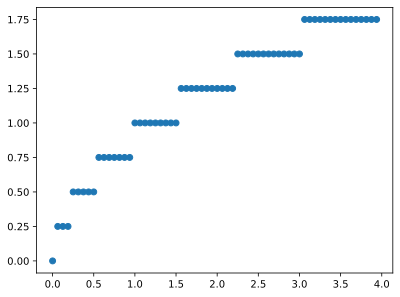

In [45]:
import matplotlib.pyplot as plt
import numpy as np

backend = AerSimulator()
tp = transpile(qc, backend)
result = backend.run(tp).result()

sv = result.get_statevector()
(x,y) = stv.extract_arithmetic_result_1d_scatter(frame, sv, a, c)

print("x", x)
print("y", y)
fig, ax = plt.subplots()

ax.scatter(x,y)
plt.show()

### Absolute value

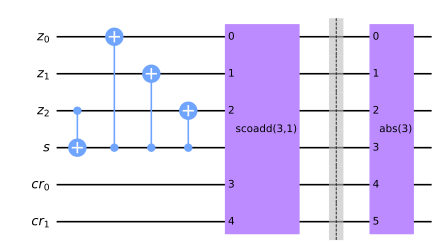

In [46]:
n=3
a = QuantumRegister(n, 'z')
s = QuantumRegister(1, 's')
cr = QuantumRegister(n-1, 'cr')
qc = QuantumCircuit(a, s, cr)

# to make the internals visible:
ari.absolute(qc, a, s, cr)
qc.barrier()

# to hide the internals:
qc.append(ari.absolute_gate(n), a[:] + s[:] + cr[:])
qc.draw(scale=0.8)

### Plot of absolute value

QuantumRegister(4, 'b')
absolute [br,s(0)] -> [br(abs(br)),s(sign(br))]br:b(4,0), cr:tmp0, s:sign0


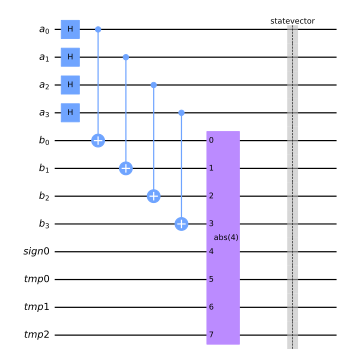

In [47]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit import transpile

import crsq.arithmetic as ari
import crsq.ast as ast
import crsq.statevector as stv
import crsq.heap as heap

areg = QuantumRegister(4, 'a')
breg = QuantumRegister(4, 'b')
qc = QuantumCircuit(areg, breg)
frame = heap.Frame(qc)

qc.h(areg)
for i in range(areg.size):
    qc.cx(areg[i], breg[i])

sc = ast.new_scope(frame)

a = sc.register(areg, signed=True)
b = sc.register(breg, signed=True)
c = sc.abs(b)

print(c.register)

sc.build_circuit()

qc.save_statevector()

qc.draw(scale=0.6)


x [0, 1, 2, 3, 4, 5, 6, 7, -1, -2, -3, -4, -5, -6, -7, -8]
y [0, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 8]


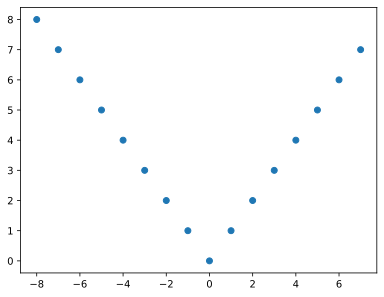

In [48]:
import matplotlib.pyplot as plt
import numpy as np


backend = AerSimulator()
tp = transpile(qc, backend)
result = backend.run(tp).result()

sv = result.get_statevector()
(x,y) = stv.extract_arithmetic_result_1d_scatter(frame, sv, a, c)

print("x", x)
print("y", y)
fig, ax = plt.subplots()

ax.scatter(x,y)
plt.show()

(bit-operations)=
## Bit operations

### Carry gate

This carry gate can be used on any bit from the LSB to MSB.  It takes a carry input from the lower bit, and produces a carry output to pass on to the higher bit.

When used for the LSB, the carry input qubit should be set to zero.

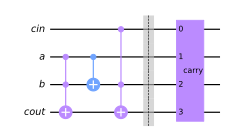

In [49]:

import crsq.arithmetic.bit_ops as bb

cin = QuantumRegister(1, "cin")  # carry in
a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(cin, a, b, cout)

# show internals
bb.carry(qc, cin, a, b, cout)
qc.barrier()
# hide internals
qc.append(bb.carry_gate(), [cin, a, b, cout])

qc.draw(scale=0.6)


### Inverse carry gate

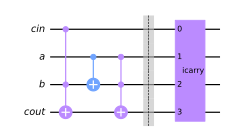

In [50]:

cin = QuantumRegister(1, "cin")  # carry in
a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(cin, a, b, cout)

# show internals
bb.icarry(qc, cin, a, b, cout)
qc.barrier()
# hide internals
qc.append(bb.icarry_gate(), [cin, a, b, cout])

qc.draw(scale=0.6)


### Carry gate for LSB with constant input

This carry gate does not take a carry input, and is intended for use with the LSB only.

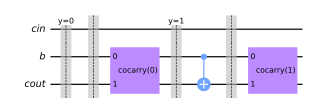

In [51]:
cin = QuantumRegister(1, "cin")
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(cin, b, cout)

## gates for the LSB

for y in range(2):
    qc.barrier(label=f"y={y}")

    # show internals
    bb.cocarry(qc, y, b, cout)  # this is a NOP for y = 0
    qc.barrier()
    # hide internals
    qc.append(bb.cocarry_gate(y), [b, cout])

qc.draw(scale=0.6)


### Inverse carry gate for LSB with constant input

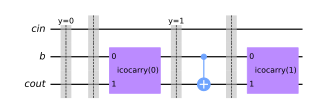

In [52]:
cin = QuantumRegister(1, "cin")
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(cin, b, cout)

for y in range(2):
    qc.barrier(label=f"y={y}")

    # show internals
    bb.icocarry(qc, y, b, cout)  # this is a NOP
    qc.barrier()
    # hide internals
    qc.append(bb.icocarry_gate(y), [b, cout])

qc.draw(scale=0.6)


### Carry gate for non-LSB with constant input

This one takes carry input from the lower bit.

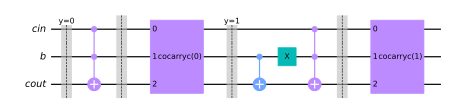

In [53]:
cin = QuantumRegister(1, "cin")
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(cin, b, cout)

## gates for non LSB
for y in range(2):
    qc.barrier(label=f"y={y}")

    # show internals
    bb.cocarryc(qc, cin, y, b, cout)
    qc.barrier()
    # hide internals
    qc.append(bb.cocarryc_gate(y), [cin, b, cout])

qc.draw(scale=0.6)

### Inverse carry gate for non-LSB with constant input

These ones are for non-LSBs and takes cin.


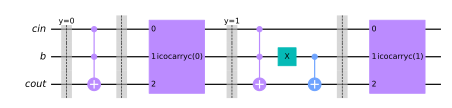

In [54]:
cin = QuantumRegister(1, "cin")
b = QuantumRegister(1, "b")
cout = QuantumRegister(1, "cout")
qc = QuantumCircuit(cin, b, cout)

## gates for non LSB
for y in range(2):
    qc.barrier(label=f"y={y}")

    # show internals
    bb.icocarryc(qc, cin, y, b, cout)  # this is a NOP
    qc.barrier()
    # hide internals
    qc.append(bb.icocarryc_gate(y), [cin, b, cout])

qc.draw(scale=0.6)

### sum gate


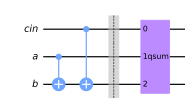

In [55]:
cin = QuantumRegister(1, "cin")  # carry in
a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
qc = QuantumCircuit(cin, a, b)

# show internals
bb.qsum(qc, cin, a, b)
qc.barrier()
# hide internals
qc.append(bb.qsum_gate(), [cin, a, b])

qc.draw(scale=0.6)

### Inverse sum gate 

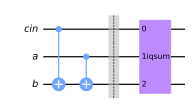

In [56]:
cin = QuantumRegister(1, "cin")  # carry in
a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
qc = QuantumCircuit(cin, a, b)

# show internals
bb.iqsum(qc, cin, a, b)
qc.barrier()
# hide internals
qc.append(bb.iqsum_gate(), [cin, a, b])

qc.draw(scale=0.6)

### Sum gate for LSB with constant input

LSB version.

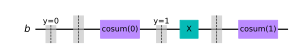

In [57]:
b = QuantumRegister(1, "b")
qc = QuantumCircuit(b)

for y in range(2):
    qc.barrier(label=f"y={y}")
    # show internals
    bb.cosum(qc, y, b)
    qc.barrier()
    # hide internals
    qc.append(bb.cosum_gate(y), [b])

qc.draw(scale=0.6)

### Sum gate for non-LSB with constant input
non LSB version. takes cin.

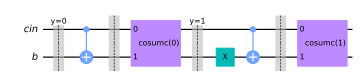

In [58]:
cin = QuantumRegister(1, "cin")  # carry in
b = QuantumRegister(1, "b")
qc = QuantumCircuit(cin, b)

for y in range(2):
    qc.barrier(label=f"y={y}")
    # show internals
    bb.cosumc(qc, cin, y, b)
    qc.barrier()
    # hide internals
    qc.append(bb.cosumc_gate(y), [cin, b])

qc.draw(scale=0.6)